In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

mpl.rc('font',**{'family':'serif','serif':['serif']})
mpl.rc('text', usetex=True)
import fitsio as fio

import h5py

import copy

import xpipe.tools.catalogs as catalogs
import xpipe.paths as paths
import xpipe.xhandle.parbins as parbins
import xpipe.xhandle.xwrap as xwrap
import xpipe.tools.selector as selector
import xpipe.xhandle.shearops as shearops
import xpipe.xhandle.pzboost as pzboost
import xpipe.tools.y3_sompz as sompz
import xpipe.tools.mass as mass
import xpipe.tools.visual as visual


from importlib import reload
import pickle


import astropy.cosmology as cosmology
# this is just the default cosmology
cosmo = cosmology.FlatLambdaCDM(Om0=0.3, H0=70)

# we make sure the correct config file is loaded here, it will let us automatically now what type of files 
# were / will be produced, and where they will be placed
paths.update_params("/home/moon/vargatn/DES/PROJECTS/xpipe/settings/params_y3lwb-v02_meta.yml")

reading DEFAULTS from default_params.yml
updating params from: /home/moon/vargatn/DES/PROJECTS/xpipe/settings/params.yml
updating params from: /home/moon/vargatn/DES/PROJECTS/xpipe/settings/params_y3lwb_meta.yml
updating params from: /home/moon/vargatn/DES/PROJECTS/xpipe/settings/params_y3lwb-v02_meta.yml

***********************

running in full mode

***********************



In [57]:

oname = "/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/lenscat/LWB_DESY3_ALL.fits"
allgal = fio.read(oname)

In [68]:
# now extract the len weights, these are not used yet we can pass them on the post-processing stage
weights = pd.DataFrame()
weights["ww"] = allgal["WSYS"]
weights["ID"] = allgal["ID"]

# Testing output

In [2]:
main_file_path = "/e/ocean1/users/vargatn/DESY3/Y3_mastercat_03_31_20.h5"
src = sompz.sompz_reader(main_file_path)
src.build_lookup()

In [3]:
flist, flist_jk, rlist, rlist_jk = parbins.get_file_lists(paths.params, paths.dirpaths)

# Compare with some old measurement

In [59]:
reload(shearops)

<module 'xpipe.xhandle.shearops' from '/home/moon/vargatn/DES/PROJECTS/xpipe/xpipe/xhandle/shearops.py'>

In [69]:
ms_opt=[np.array([-0.02,-0.024,-0.037]),np.array([-0.024,-0.037]),np.array([-0.024,-0.037]),np.array([-0.037,])]
optsbins=[(1,2,3),(2,3),(2,3),(3,)]

ACP_optms = []
for i, fname in enumerate(flist):
#     print(ms[i],optsbins[i])
    mfac_opt=1/(1+ms_opt[i])

    ACP = shearops.AutoCalibrateProfile([fname,], flist_jk[i], src, xlims=(0.01, 100), sbins=optsbins[i])
    ACP.get_profiles(ismeta=True, weights=weights, id_key="ID", z_key="Z", mfactor_sbins=mfac_opt) #
    ACP_optms.append(ACP)

loading source bin 1
loading source bin 2
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v07/lwb-y3-lowz+cmass_v07_lens_qbin-0.fits
loading source bin 2
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v07/lwb-y3-lowz+cmass_v07_lens_qbin-1.fits
loading source bin 2
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v07/lwb-y3-lowz+cmass_v07_lens_qbin-2.fits
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v07/lwb-y3-lowz+cmass_v07_lens_qbin-3.fits


/home/moon/vargatn/anaconda3/envs/main3/lib/python3.8/site-packages/numpy/ma/core.py:6846: RuntimeWarning: underflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


Text(0, 0.5, '$\\Delta\\Sigma$ [$M_\\odot  / pc^2$]')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


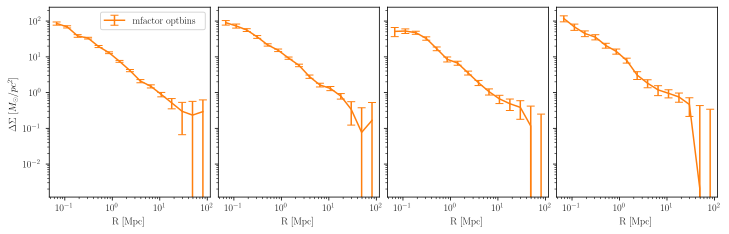

In [6]:
fig, axarr = plt.subplots(ncols=4, figsize=(12, 3.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in np.arange(4):
    prof = ACP_optms[i]
    axarr[i].errorbar(prof.rr, prof.dst, yerr=prof.dst_err, capsize=4, color="C1", ls="-",
                      label="mfactor optbins")

    
    axarr[i].set_xlabel("R [Mpc]")
    axarr[i].set_xscale("log")
    axarr[i].set_yscale("log")
    
axarr[0].legend()
    
    
axarr[0].set_ylabel("$\Delta\Sigma$ [$M_\odot  / pc^2$]")

Text(0, 0.5, '$R\\cdot\\Delta\\Sigma$ [$M_\\odot  / pc$]')

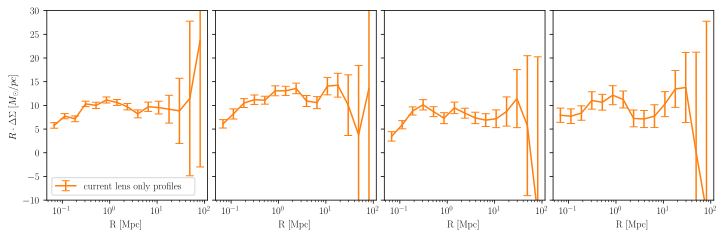

In [64]:
fig, axarr = plt.subplots(ncols=4, figsize=(12, 3.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in np.arange(4):
    prof = ACP_optms[i]
    axarr[i].errorbar(prof.rr,  prof.rr * prof.dst, yerr=prof.rr* prof.dst_err, capsize=4, color="C1", ls="-",
                      label="current lens only profiles")
    
    axarr[i].set_xlabel("R [Mpc]")
    axarr[i].set_xscale("log")
#     axarr[i].set_yscale("log")

    axarr[i].set_ylim(-10, 30)
    
axarr[0].legend()
    
    
axarr[0].set_ylabel("$R\cdot\Delta\Sigma$ [$M_\odot  / pc$]")

In [10]:
ACP_optms[0].scinvs

array([0.00020426, 0.00028487, 0.00030714])

In [11]:
reload(shearops)

<module 'xpipe.xhandle.shearops' from '/home/moon/vargatn/DES/PROJECTS/xpipe/xpipe/xhandle/shearops.py'>

In [15]:
ACP_optms[i].scinvs

array([0.00020426, 0.00028487, 0.00030714])

In [16]:
reload(shearops)

<module 'xpipe.xhandle.shearops' from '/home/moon/vargatn/DES/PROJECTS/xpipe/xpipe/xhandle/shearops.py'>

In [17]:
ACP_optm_rands = []
for i, rname in enumerate(rlist):
    mfac_opt=1/(1+ms_opt[i])

    # processing randoms
    ACP = shearops.AutoCalibrateProfile([rname,], rlist_jk[i], src, xlims=(0.01, 100), sbins=optsbins[i])
    ACP.get_profiles(scinvs=ACP_optms[i].scinvs, ismeta=False, id_key="ID", z_key="Z", mfactor_sbins=mfac_opt) #
    ACP_optm_rands.append(ACP)

loading source bin 1
loading source bin 2
loading source bin 3
loading source bin 2
loading source bin 3
loading source bin 2
loading source bin 3
loading source bin 3


Text(0, 0.5, '$R\\cdot\\Delta\\Sigma$ [$M_\\odot  / pc$]')

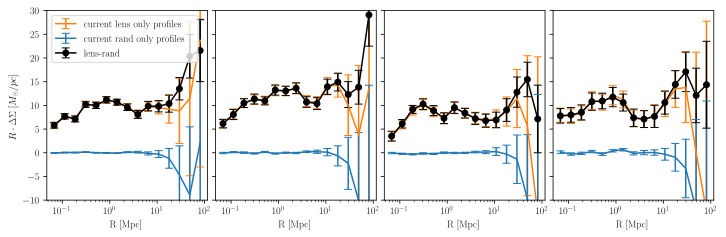

In [19]:
fig, axarr = plt.subplots(ncols=4, figsize=(12, 3.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in np.arange(4):
    prof = ACP_optms[i]
    axarr[i].errorbar(prof.rr,  prof.rr * prof.dst, yerr=prof.rr* prof.dst_err, capsize=4, color="C1", ls="-",
                      label="current lens only profiles")
    
    prof = ACP_optm_rands[i]
    axarr[i].errorbar(prof.rr,  prof.rr * prof.dst, yerr=prof.rr* prof.dst_err, capsize=4, color="C0", ls="-",
                      label="current rand only profiles")    
    
    prof1 = copy.copy(ACP_optms[i].profile)
    prof2 = copy.copy(ACP_optm_rands[i].profile)
    prof1.composite(prof2, operation="-")
    axarr[i].errorbar(prof1.rr,  prof1.rr * prof1.dst, yerr=prof1.rr* prof1.dst_err, capsize=4,
                      color="black", ls="-", marker="o",
                      label="lens-rand")   
    
    axarr[i].set_xlabel("R [Mpc]")
    axarr[i].set_xscale("log")
#     axarr[i].set_yscale("log")

    axarr[i].set_ylim(-10, 30)
    
axarr[0].legend()
    
    
axarr[0].set_ylabel("$R\cdot\Delta\Sigma$ [$M_\odot  / pc$]")

Text(0, 0.5, '$R\\cdot\\Delta\\Sigma$ B-mode [$M_\\odot  / pc$]')

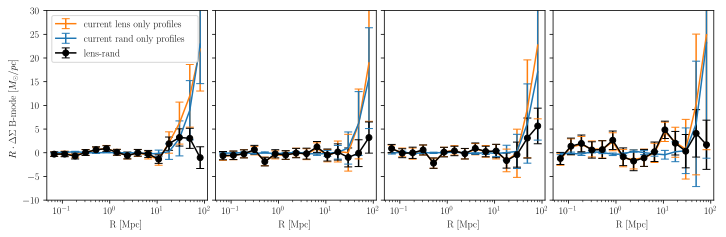

In [21]:
fig, axarr = plt.subplots(ncols=4, figsize=(12, 3.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in np.arange(4):
    prof = ACP_optms[i]
    axarr[i].errorbar(prof.rr,  prof.rr * prof.profile.dsx, yerr=prof.rr* prof.profile.dsx_err, capsize=4, color="C1", ls="-",
                      label="current lens only profiles")
    
    prof = ACP_optm_rands[i]
    axarr[i].errorbar(prof.rr,  prof.rr * prof.profile.dsx, yerr=prof.rr* prof.profile.dsx_err, capsize=4, color="C0", ls="-",
                      label="current rand only profiles")    
    
    prof1 = copy.copy(ACP_optms[i].profile)
    prof2 = copy.copy(ACP_optm_rands[i].profile)
    prof1.composite(prof2, operation="-")
    axarr[i].errorbar(prof1.rr,  prof1.rr * prof1.dsx, yerr=prof1.rr* prof1.dsx_err, capsize=4,
                      color="black", ls="-", marker="o",
                      label="lens-rand")   
    
    axarr[i].set_xlabel("R [Mpc]")
    axarr[i].set_xscale("log")
#     axarr[i].set_yscale("log")

    axarr[i].set_ylim(-10, 30)
    
axarr[0].legend()
    
    
axarr[0].set_ylabel("$R\cdot\Delta\Sigma$ B-mode [$M_\odot  / pc$]")

# Adding boost factors

In [23]:
# !!! Uncomment this block and run once !!!
optsbins=[(1,2,3),(2,3),(2,3),(3,)]
# # For each redshift bin
for i in np.arange(4):
    # First we need to match the source id with the BPZ photot-z
    smb = pzboost.SOMBoost(src, [flist_jk[i],], sbins=optsbins[i])
    smb.get_pair_datas(pair_outpath="lwb-y3-lowz+cmass_v07_lens_optsbins_qbin-"+str(i)+"_pairs.p") 
    #     # this could take a few minutes or so
    #     # It saves the matched version of the pairs to the specified file name    

0 1
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 1 5
0 1 6
0 1 7
0 1 8
0 1 9
0 1 10
0 1 11
0 1 12
0 1 13
0 1 14
0 1 15
0 1 16
0 1 17
0 1 18
0 1 19
0 1 20
0 1 21
0 1 22
0 1 23
0 1 24
0 1 25
0 1 26
0 1 27
0 1 28
0 1 29
0 1 30
0 1 31
0 1 32
0 1 33
0 1 34
0 1 35
0 1 36
0 1 37
0 1 38
0 1 39
0 1 40
0 1 41
0 1 42
0 1 43
0 1 44
0 1 45
0 1 46
0 1 47
0 1 48
0 1 49
0 1 50
0 1 51
0 1 52
0 1 53
0 1 54
0 1 55
0 1 56
0 1 57
0 1 58
0 1 59
0 1 60
0 1 61
0 1 62
0 1 63
0 1 64
0 1 65
0 1 66
0 1 67
0 1 68
0 1 69
0 1 70
0 1 71
0 1 72
0 1 73
0 1 74
merged catalogs
0 2
0 2 0
0 2 1
0 2 2
0 2 3
0 2 4
0 2 5
0 2 6
0 2 7
0 2 8
0 2 9
0 2 10
0 2 11
0 2 12
0 2 13
0 2 14
0 2 15
0 2 16
0 2 17
0 2 18
0 2 19
0 2 20
0 2 21
0 2 22
0 2 23
0 2 24
0 2 25
0 2 26
0 2 27
0 2 28
0 2 29
0 2 30
0 2 31
0 2 32
0 2 33
0 2 34
0 2 35
0 2 36
0 2 37
0 2 38
0 2 39
0 2 40
0 2 41
0 2 42
0 2 43
0 2 44
0 2 45
0 2 46
0 2 47
0 2 48
0 2 49
0 2 50
0 2 51
0 2 52
0 2 53
0 2 54
0 2 55
0 2 56
0 2 57
0 2 58
0 2 59
0 2 60
0 2 61
0 2 62
0 2 63
0 2 64
0 2 65
0 2 66
0 

In [51]:
# Then run this
optsbins=[(1, 2, 3),(2, 3),(2, 3),(3,)]
bins_to_use = np.concatenate((np.arange(11), (14,)))
smbs = []
ACPs_boosted = []
for i in np.arange(4):
    # Load the pairs files pre-processed above
    smb = pzboost.SOMBoost(src, [flist_jk[i],], sbins=optsbins[i],
                           pairs_to_load="lwb-y3-lowz+cmass_v07_lens_optsbins_qbin-"+str(i)+"_pairs.p")
    smb.prep_boost(bins_to_use=bins_to_use) # these are the indices of the radial bins to be used
    smb.get_boost(npdf=11) # use the inner 9 radial bins (and the last as the reference PDF)
    smbs.append(smb)
    ACP = copy.copy(ACP_optms[i])
    ACP.add_boost(smb)
    ACPs_boosted.append(ACP)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [14]]
0 0
0 1
0 2
(11,)
4
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [14]]
0 0
0 1
(11,)
4
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [14]]
0 0


/home/moon/vargatn/anaconda3/envs/main3/lib/python3.8/site-packages/scipy/optimize/_lsq/common.py:453: RuntimeWarning: underflow encountered in nextafter
  x_new[lower_mask] = np.nextafter(lb[lower_mask], ub[lower_mask])
/home/moon/vargatn/DES/PROJECTS/xpipe/xpipe/xhandle/pzboost.py:975: RuntimeWarning: underflow encountered in multiply
  self.mixarr[i, :] = amps[i] * garr + (1. - amps[i]) * self.refpdf
/home/moon/vargatn/anaconda3/envs/main3/lib/python3.8/site-packages/scipy/optimize/_lsq/trf.py:263: RuntimeWarning: underflow encountered in multiply
  g_norm = norm(g * v, ord=np.inf)
/home/moon/vargatn/anaconda3/envs/main3/lib/python3.8/site-packages/scipy/optimize/_lsq/trf.py:142: RuntimeWarning: underflow encountered in multiply
  p *= p_stride
/home/moon/vargatn/anaconda3/envs/main3/lib/python3.8/site-packages/scipy/optimize/_lsq/trf.py:178: RuntimeWarning: underflow encountered in multiply
  p *= theta
/home/moon/vargatn/anaconda3/envs/main3/lib/python3.8/site-packages/scipy/optim

0 1


/home/moon/vargatn/DES/PROJECTS/xpipe/xpipe/xhandle/shearops.py:993: RuntimeWarning: underflow encountered in multiply
  self._fcls.append(_amp)


(11,)
4
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [14]]
0 0
(11,)
4


In [48]:
smb.boost_amps[0][0]

array([2.73559284e-01, 1.91814721e-01, 1.24523906e-01, 7.46822842e-02,
       4.59991981e-02, 2.30137608e-02, 1.07894446e-02, 1.85105055e-03,
       2.44181137e-36, 1.90392879e-29, 2.77965786e-16])

In [49]:
smbs[0].boost_amps

[[array([0.61564387, 0.44494169, 0.32783083, 0.17195839, 0.11216682,
         0.06823017, 0.06500397, 0.07376553, 0.05047182, 0.04110781,
         0.04534361]),
  array([0.16061221, 0.09635126, 0.05735299, 0.03279694, 0.02064367,
         0.00985562, 0.00646289, 0.00525747, 0.00717785, 0.01030672,
         0.00694061]),
  array([0.07977758, 0.05470842, 0.04115964, 0.02961288, 0.02182764,
         0.01758038, 0.01544151, 0.01377813, 0.01533904, 0.01586303,
         0.01502234])]]

No handles with labels found to put in legend.


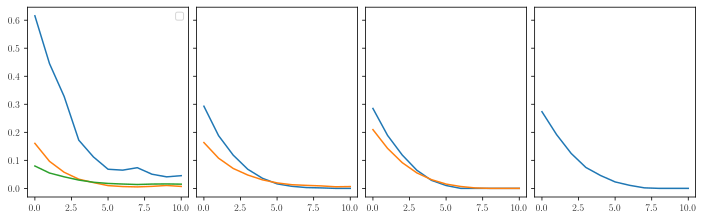

In [50]:
fig, axarr = plt.subplots(ncols=4, figsize=(12, 3.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in np.arange(4):
    for j in np.arange(len(optsbins[i])):
        axarr[i].plot(smbs[i].boost_amps[0][j])
    
axarr[0].legend()
    

Text(0, 0.5, '$R\\cdot\\Delta\\Sigma$ [$M_\\odot  / pc$]')

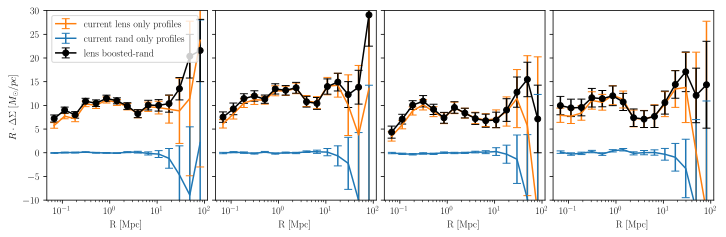

In [52]:
fig, axarr = plt.subplots(ncols=4, figsize=(12, 3.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in np.arange(4):
    prof = ACP_optms[i]
    axarr[i].errorbar(prof.rr,  prof.rr * prof.dst, yerr=prof.rr* prof.dst_err, capsize=4, color="C1", ls="-",
                      label="current lens only profiles")
    
    prof = ACP_optm_rands[i]
    axarr[i].errorbar(prof.rr,  prof.rr * prof.dst, yerr=prof.rr* prof.dst_err, capsize=4, color="C0", ls="-",
                      label="current rand only profiles")    
    
    prof1 = copy.copy(ACPs_boosted[i].profile)
    prof2 = copy.copy(ACP_optm_rands[i].profile)
    prof1.composite(prof2, operation="-")
    axarr[i].errorbar(prof1.rr,  prof1.rr * prof1.dst, yerr=prof1.rr* prof1.dst_err, capsize=4,
                      color="black", ls="-", marker="o",
                      label="lens boosted-rand")   
    
    axarr[i].set_xlabel("R [Mpc]")
    axarr[i].set_xscale("log")
#     axarr[i].set_yscale("log")

    axarr[i].set_ylim(-10, 30)
    
axarr[0].legend()
    
    
axarr[0].set_ylabel("$R\cdot\Delta\Sigma$ [$M_\odot  / pc$]")

In [53]:
# calculate stack-wise subtraction
profiles_subtracted = []
for i in np.arange(4):
    prof1 = copy.copy(ACPs_boosted[i].profile)
#     prof1 = copy.copy(ACP_optms[i].profile)
    prof2 = copy.copy(ACP_optm_rands[i].profile)
#     prof = prof1.profile.composite
    prof1.composite(prof2, operation="-")
    profiles_subtracted.append(prof1)

Text(0, 0.5, '$R\\cdot\\Delta\\Sigma$ [$M_\\odot  / pc$]')

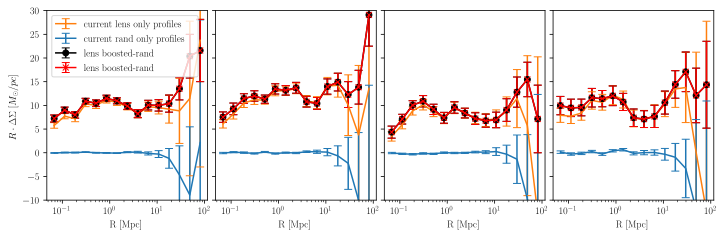

In [54]:
fig, axarr = plt.subplots(ncols=4, figsize=(12, 3.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in np.arange(4):
    prof = ACP_optms[i]
    axarr[i].errorbar(prof.rr,  prof.rr * prof.dst, yerr=prof.rr* prof.dst_err, capsize=4, color="C1", ls="-",
                      label="current lens only profiles")
    
    prof = ACP_optm_rands[i]
    axarr[i].errorbar(prof.rr,  prof.rr * prof.dst, yerr=prof.rr* prof.dst_err, capsize=4, color="C0", ls="-",
                      label="current rand only profiles")    
    
    prof1 = copy.copy(ACPs_boosted[i].profile)
    prof2 = copy.copy(ACP_optm_rands[i].profile)
    prof1.composite(prof2, operation="-")
    axarr[i].errorbar(prof1.rr,  prof1.rr * prof1.dst, yerr=prof1.rr* prof1.dst_err, capsize=4,
                      color="black", ls="-", marker="o",
                      label="lens boosted-rand")   
    prof = profiles_subtracted[i]
    axarr[i].errorbar(prof.rr,  prof.rr * prof.dst, yerr=prof.rr* prof.dst_err, capsize=4,
                      color="red", ls="-", marker="x",
                      label="lens boosted-rand")   
    
    axarr[i].set_xlabel("R [Mpc]")
    axarr[i].set_xscale("log")
#     axarr[i].set_yscale("log")

    axarr[i].set_ylim(-10, 30)
    
axarr[0].legend()
    
    
axarr[0].set_ylabel("$R\cdot\Delta\Sigma$ [$M_\odot  / pc$]")

In [55]:
def write_profile(prof, path):
    """saves DeltaSigma and covariance in text format"""

    # Saving profile
    profheader = "R [Mpc]\tDeltaSigma_t [M_sun / pc^2]\tDeltaSigma_t_err [M_sun / pc^2]\tDeltaSigma_x [M_sun / pc^2]\tDeltaSigma_x_err [M_sun / pc^2]"
    res = np.vstack((prof.rr, prof.dst, prof.dst_err, prof.dsx, prof.dsx_err)).T
    fname = path + "_profile.dat"
    print("saving:", fname)
    np.savetxt(fname, res, header=profheader)

    # Saving covariance
    np.savetxt(path + "_dst_cov.dat", prof.dst_cov)
    np.savetxt(path + "_dsx_cov.dat", prof.dsx_cov)

In [56]:
# tmp_profs = copy.deepcopy(profiles)
fnames = []
for i in np.arange(4):
#     for s in np.arange(3):
#         scinv = scinvs[i][s+1]
#         prof = tmp_profs[i][s]
#         prof.multiply(1 / scinv)
        fname = "LWB_lowz+cmass-100Mpc_boost_rand-subtr_NO-RSel_zbin"+str(i)+"_combined_v2"
        fnames.append(fname)
        prof = profiles_subtracted[i]
        write_profile(prof, fname)

saving: LWB_lowz+cmass-100Mpc_boost_rand-subtr_NO-RSel_zbin0_combined_v2_profile.dat
saving: LWB_lowz+cmass-100Mpc_boost_rand-subtr_NO-RSel_zbin1_combined_v2_profile.dat
saving: LWB_lowz+cmass-100Mpc_boost_rand-subtr_NO-RSel_zbin2_combined_v2_profile.dat
saving: LWB_lowz+cmass-100Mpc_boost_rand-subtr_NO-RSel_zbin3_combined_v2_profile.dat
